In [1]:
import numpy as np
import pandas as pd

import pro_version as MLR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("infor_Data.csv")

In [3]:
# Splitting the DataFrame into training and testing sets with a 70-30 split ratio
# and specifying a random seed for reproducibility
train, test = train_test_split(df, test_size = 0.3, random_state=40)

# Split the data again to simplify the problem with curr practice
x_train = train.iloc[:, :-1] # All columns except the last one
y_train = train.iloc[:, -1]  # The last column

x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]
print(x_test.shape)

(2413, 9)


# Normalize the dataset

In [4]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [40]:
# Create Linear Regression model
model = LinearRegression()

# Fit model to data
model.fit(x_train_scaler, y_train)

# Prediction
y_pred = model.predict(x_test_scaler)
y_pred = y_pred.reshape(-1, 1)
print(y_pred.shape)


(2413, 1)


In [6]:
"""Manual"""
model_Manual = MLR.Multiple_LinearRegression()

# Compute coeficient
model_Manual.fit(x_train, y_train)


# Predicttion
y_predManual = model_Manual.predict(x_test)

print(y_predManual)


[[166.81179846]
 [159.44677609]
 [185.66555578]
 ...
 [137.97060054]
 [158.69014382]
 [159.71958032]]


In [41]:
print(y_pred.shape)
print(y_test.shape)

(2413, 1)
(2413,)


In [8]:
print(model_Manual.MSE(y_test, y_predManual))

4321.2857370047095


# Evaluate the model using K-fold Cross-Validation

In [46]:
df_comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred.reshape(-1)})
print(df_comp)

      Actual   Predicted
520   181.50  194.823195
5230  135.00  132.357145
133   235.00  223.884011
5646  209.38  210.836926
1224  119.94  200.175022
...      ...         ...
7661  343.56  177.170284
692   165.25  130.776392
7356   62.50   84.013461
7685  141.25  163.623657
4806  112.88  151.374466

[2413 rows x 2 columns]


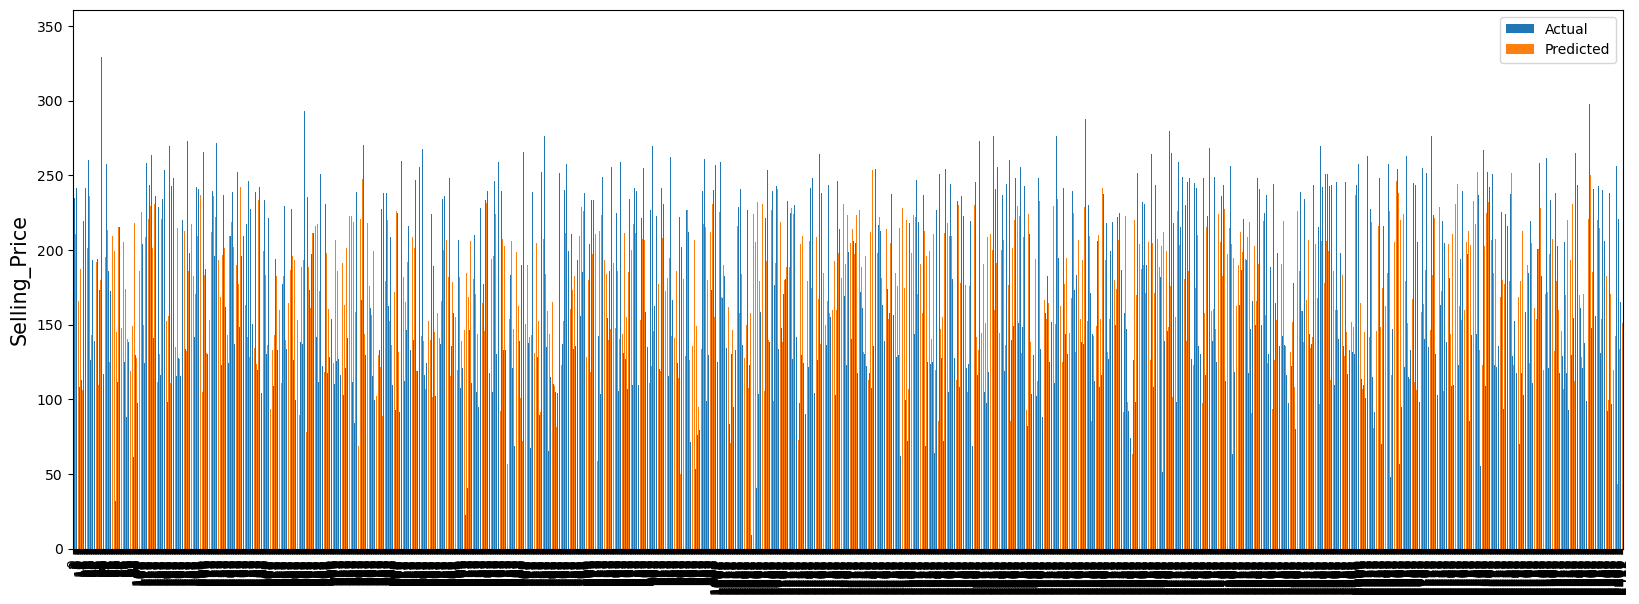

In [48]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

compare_plot(df_comp)